In [45]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
from scipy import stats
import numpy as np

In [5]:
Neoprot_data = pd.read_csv('Data/Tonian_Cryogenian_Composite_data.csv')
Phanerozoic_LOWESS = pd.read_excel('Data/LOWESS 5 Skeleton 09 04 13.xlsx')

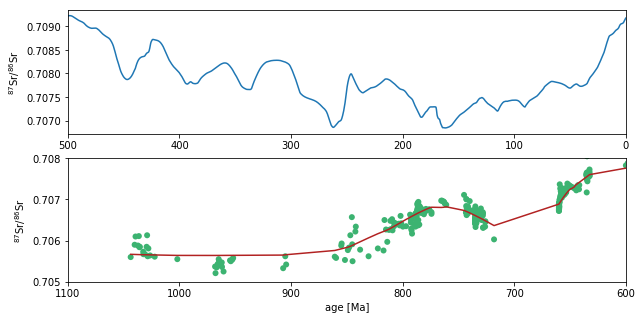

In [6]:
xy_87Sr86Sr = sm.nonparametric.lowess(Neoprot_data['87Sr/86Sr_primary'], Neoprot_data['age'], frac=0.25)

fig, ax = plt.subplots(2,1, figsize=(10,5))
ax[0].plot(Phanerozoic_LOWESS['Age'], Phanerozoic_LOWESS['Mean'])
ax[0].set_ylabel('$^{87}$Sr/$^{86}$Sr')
ax[0].set_xlim(500,0)

ax[1].scatter(Neoprot_data['age'], Neoprot_data['87Sr/86Sr_primary'], facecolor='mediumseagreen', edgecolor='none')
ax[1].plot(xy_87Sr86Sr[:,0], xy_87Sr86Sr[:,1], color='firebrick')
ax[1].set_xlim(1100,600)
ax[1].set_xlabel('age [Ma]')
ax[1].set_ylim(0.705,0.708)
ax[1].set_ylabel('$^{87}$Sr/$^{86}$Sr')
plt.show(fig)

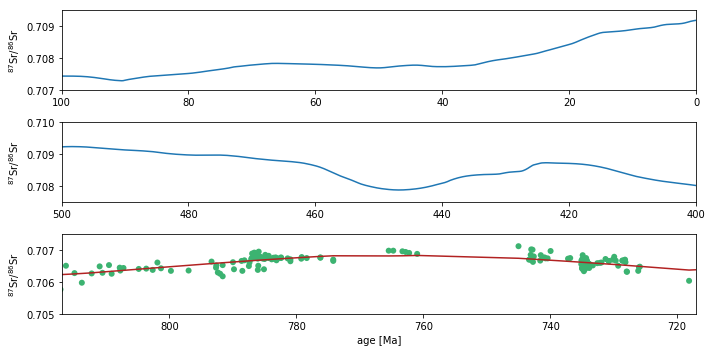

In [13]:
fig, ax = plt.subplots(3,1, figsize=(10,5))
ax[0].plot(Phanerozoic_LOWESS['Age'], Phanerozoic_LOWESS['Mean'])
ax[0].set_ylabel('$^{87}$Sr/$^{86}$Sr')
ax[0].set_xlim(100,0)
ax[0].set_ylim(0.707,0.7095)
ax[1].plot(Phanerozoic_LOWESS['Age'], Phanerozoic_LOWESS['Mean'])
ax[1].set_ylabel('$^{87}$Sr/$^{86}$Sr')
ax[1].set_xlim(500,400)
ax[1].set_ylim(0.7075,0.710)
ax[2].scatter(Neoprot_data['age'], Neoprot_data['87Sr/86Sr_primary'], facecolor='mediumseagreen', edgecolor='none')
ax[2].plot(xy_87Sr86Sr[:,0], xy_87Sr86Sr[:,1], color='firebrick')
ax[2].set_xlim(817,717)
ax[2].set_xlabel('age [Ma]')
ax[2].set_ylim(0.7050,0.7075)
ax[2].set_ylabel('$^{87}$Sr/$^{86}$Sr')
plt.tight_layout()
plt.show(fig)

In [35]:
pre_Sturt_data = Neoprot_data[Neoprot_data['age']>717]
pre_Sturt_post800_data = pre_Sturt_data[pre_Sturt_data['age']<800]
pre_Sturt_lowess = sm.nonparametric.lowess(pre_Sturt_post800_data['87Sr/86Sr_primary'], pre_Sturt_post800_data['age'], frac=0.4)

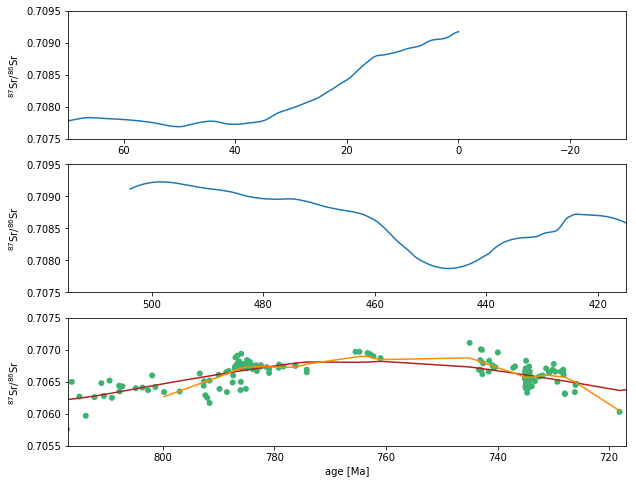

In [36]:
fig, ax = plt.subplots(3,1, figsize=(10,8))
ax[0].plot(Phanerozoic_LOWESS['Age'], Phanerozoic_LOWESS['Mean'])
ax[0].set_ylabel('$^{87}$Sr/$^{86}$Sr')
ax[0].set_xlim(70,-30)
ax[0].set_ylim(0.7075,0.7095)

ax[1].plot(Phanerozoic_LOWESS['Age'], Phanerozoic_LOWESS['Mean'])
ax[1].set_ylabel('$^{87}$Sr/$^{86}$Sr')
ax[1].set_xlim(515,415)
ax[1].set_ylim(0.7075,0.7095)

ax[2].scatter(Neoprot_data['age'], Neoprot_data['87Sr/86Sr_primary'], facecolor='mediumseagreen', edgecolor='none')
ax[2].plot(xy_87Sr86Sr[:,0], xy_87Sr86Sr[:,1], color='firebrick')
ax[2].plot(pre_Sturt_lowess[:,0], pre_Sturt_lowess[:,1], color='darkorange')
ax[2].set_xlim(817,717)
ax[2].set_xlabel('age [Ma]')
ax[2].set_ylim(0.7055,0.7075)
ax[2].set_ylabel('$^{87}$Sr/$^{86}$Sr')
plt.show(fig)

In [54]:
Phanerozoic_LOWESS_35Ma = Phanerozoic_LOWESS[Phanerozoic_LOWESS['Age']<35]
detrended_35Ma = signal.detrend(Phanerozoic_LOWESS_35Ma['Mean'])

Ordovician_LOWESS = Phanerozoic_LOWESS[Phanerozoic_LOWESS['Age']<500]
Ordovician_LOWESS = Ordovician_LOWESS[Ordovician_LOWESS['Age']>445]
Ordovician_LOWESS_detrended = signal.detrend(Ordovician_LOWESS['Mean'])

pre_Sturt_lowess_detrended = signal.detrend(pre_Sturt_lowess[:,1])

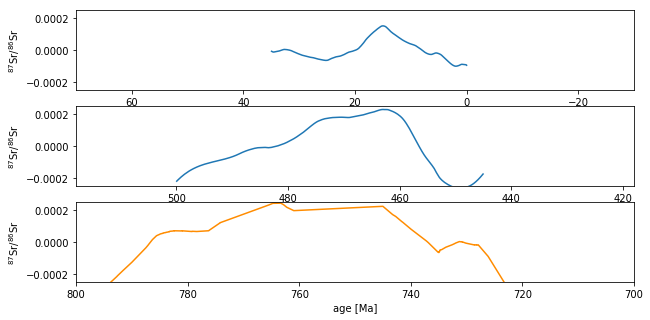

In [55]:
fig, ax = plt.subplots(3,1, figsize=(10,5))
ax[0].plot(Phanerozoic_LOWESS_35Ma['Age'], detrended_35Ma.tolist())
ax[0].set_ylabel('$^{87}$Sr/$^{86}$Sr')
ax[0].set_xlim(70,-30)
ax[0].set_ylim(-.00025,.00025)

ax[1].plot(Ordovician_LOWESS['Age'], Ordovician_LOWESS_detrended.tolist())
ax[1].set_ylabel('$^{87}$Sr/$^{86}$Sr')
ax[1].set_xlim(518,418)
ax[1].set_ylim(-.00025,.00025)


ax[2].plot(pre_Sturt_lowess[:,0], pre_Sturt_lowess_detrended, color='darkorange')
ax[2].set_xlim(800,700)
ax[2].set_xlabel('age [Ma]')
ax[2].set_ylim(-.00025,.00025)
ax[2].set_ylabel('$^{87}$Sr/$^{86}$Sr')
plt.show(fig)

In [76]:
pre_Taconic_LOWESS = Ordovician_LOWESS[Ordovician_LOWESS['Age']>465]
pre_Taconic_slope, intercept, r_value, p_value, std_err = stats.linregress(pre_Taconic_LOWESS['Age'],pre_Taconic_LOWESS['Mean'])
stats.linregress(pre_Taconic_LOWESS['Age'],pre_Taconic_LOWESS['Mean'])

LinregressResult(slope=1.2992298570497461e-05, intercept=0.702755551418991, rvalue=0.9900717492167207, pvalue=0.0, stderr=6.986725351357694e-08)

In [77]:
post_Taconic_LOWESS = Ordovician_LOWESS[Ordovician_LOWESS['Age']<465]
post_Taconic_slope, intercept, r_value, p_value, std_err = stats.linregress(post_Taconic_LOWESS['Age'],post_Taconic_LOWESS['Mean'])
stats.linregress(post_Taconic_LOWESS['Age'],post_Taconic_LOWESS['Mean'])

LinregressResult(slope=5.685700759436155e-05, intercept=0.6824037517701295, rvalue=0.9813910130072077, pvalue=1.2558345767455555e-286, stderr=5.5833278407476e-07)

In [78]:
post_Taconic_slope-pre_Taconic_slope

4.386470902386409e-05

In [60]:
pre_15Ma_LOWESS = Phanerozoic_LOWESS_35Ma[Phanerozoic_LOWESS_35Ma['Age']>15]
pre_15Ma_slope, intercept, r_value, p_value, std_err = stats.linregress(pre_15Ma_LOWESS['Age'],pre_15Ma_LOWESS['Mean'])
stats.linregress(pre_15Ma_LOWESS['Age'],pre_15Ma_LOWESS['Mean'])

LinregressResult(slope=-4.8040487777231937e-05, intercept=0.709410429988917, rvalue=-0.9866737548863717, pvalue=3.472857424e-315, stderr=3.976085864219046e-07)

In [61]:
post_15Ma_LOWESS = Phanerozoic_LOWESS_35Ma[Phanerozoic_LOWESS_35Ma['Age']<15]
post_15Ma_slope, intercept, r_value, p_value, std_err = stats.linregress(post_15Ma_LOWESS['Age'],post_15Ma_LOWESS['Mean'])
stats.linregress(post_15Ma_LOWESS['Age'],post_15Ma_LOWESS['Mean'])

LinregressResult(slope=-2.5589800584450416e-05, intercept=0.7091485338093687, rvalue=-0.993433096372919, pvalue=1.243636752255372e-282, stderr=1.707266421264128e-07)

In [74]:
pre_15Ma_slope-post_15Ma_slope

-2.245068719278152e-05

In [70]:
pre_Sturt_lowess[:,0][0:80]

array([718.126, 725.885, 726.02 , 726.14 , 727.911, 727.957, 728.146,
       728.216, 728.216, 728.413, 728.624, 728.624, 729.293, 729.68 ,
       729.92 , 730.136, 730.773, 730.773, 731.292, 731.94 , 732.164,
       732.577, 733.29 , 733.728, 733.863, 733.939, 734.208, 734.285,
       734.319, 734.35 , 734.46 , 734.487, 734.692, 734.703, 734.746,
       734.771, 734.799, 734.803, 734.807, 734.811, 734.815, 734.82 ,
       734.824, 734.827, 734.832, 734.835, 734.84 , 734.888, 734.9  ,
       734.942, 734.943, 734.944, 734.947, 734.95 , 734.953, 734.954,
       735.088, 735.11 , 736.855, 737.195, 739.945, 740.408, 740.74 ,
       740.916, 741.49 , 741.578, 742.589, 742.723, 742.791, 742.925,
       742.993, 743.079, 743.127, 743.344, 745.   , 760.966, 762.228,
       762.787, 763.289, 764.73 ])

In [71]:
post_765Ma_slope, intercept, r_value, p_value, std_err = stats.linregress(pre_Sturt_lowess[:,0][0:80],pre_Sturt_lowess[:,1][0:80])
stats.linregress(pre_Sturt_lowess[:,0][0:80],pre_Sturt_lowess[:,1][0:80])

LinregressResult(slope=1.2762445790644849e-05, intercept=0.697229636853825, rvalue=0.8443839774009994, pvalue=7.65811697082256e-23, stderr=9.168524527587878e-07)

In [72]:
pre_765Ma_slope, intercept, r_value, p_value, std_err = stats.linregress(pre_Sturt_lowess[:,0][80:],pre_Sturt_lowess[:,1][80:])
stats.linregress(pre_Sturt_lowess[:,0][80:],pre_Sturt_lowess[:,1][80:])

LinregressResult(slope=-1.616639370453448e-05, intercept=0.7193735356887138, rvalue=-0.8480517632771855, pvalue=2.6020236783736077e-19, stderr=1.2627160500431178e-06)

In [73]:
post_765Ma_slope-pre_765Ma_slope

2.892883949517933e-05